# Logistic Regression

Logistic regression, also known as Logit Regression, is a regression algorithm used for classification. It estimates the the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class, or else it predicts that it does not. This makes it a binary classifier.

## Example

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
from sklearn.datasets import load_iris

### Load and prepare data

In [2]:
iris = load_iris()

In [12]:
pp(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [16]:
# pp(iris.DESCR.splitlines())

In [62]:
# Use petal width only
X = iris['data'][:, 3:]

In [63]:
# 1 if Iris-Virginica, else 0
y = iris['target'] == 2
y = y.astype(np.int)

### Train model

In [64]:
from sklearn.linear_model import LogisticRegression

Logistic Regerssion models can be regularized using l1 or l2 penalites. Scikit-learn, by default, adds an l2 penalty. The hyperparameter C controlling the regularization strength is the inverse of alpha: a higher value corresponds to less regularization.

In [83]:
log_reg = LogisticRegression(C=1, random_state=42)

In [84]:
log_reg.fit(X, y)

/anaconda3/envs/learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Make predictions

In [85]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# Reshape it to make sure that it is a 2D matrix
X_new.shape

(1000, 1)

In [86]:
y_proba = log_reg.predict_proba(X_new)

Text(0, 0.5, 'Probability')

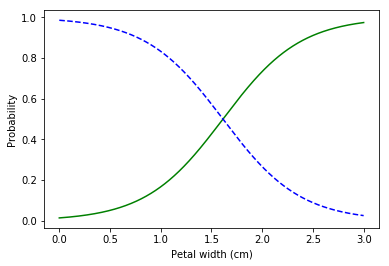

In [87]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')

In [88]:
X_test = np.array([[1.5],[1.7]])
X_test.shape

(2, 1)

In [89]:
log_reg.predict(X_test)

array([0, 1])